# PREDICTION OF CALORIES BURNT 

Import dependencies

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


Data collection and preprocessing

In [38]:
#loading the data from csv file to a pandas dataframe
calories=pd.read_csv("calories.csv")
calories.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [39]:
exercise=pd.read_csv("exercise.csv")
exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [40]:
#combining two dataframes
data=pd.concat([exercise,calories["Calories"]],axis=1)
data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [41]:
data.shape

(15000, 9)

In [42]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [44]:
data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data visualisation


In [45]:
sns.set()

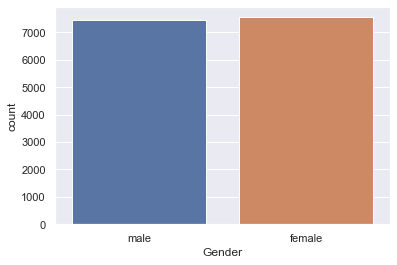

In [46]:
sns.countplot(data["Gender"])
plt.show()

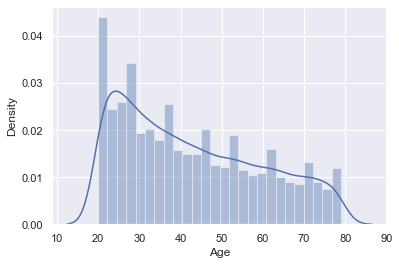

In [47]:
sns.distplot(data["Age"])
plt.show()

In [48]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

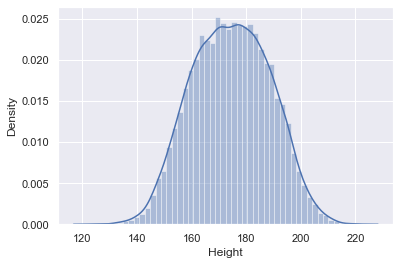

In [49]:
sns.distplot(data["Height"])
plt.show()

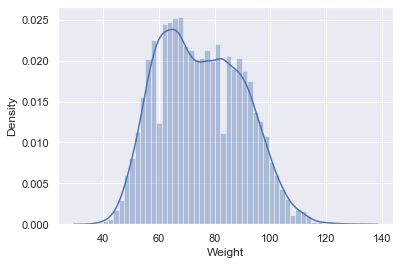

In [50]:
sns.distplot(data["Weight"])
plt.show()

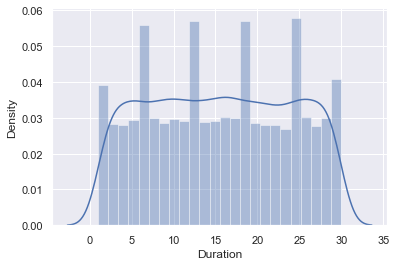

In [51]:
sns.distplot(data["Duration"])
plt.show()

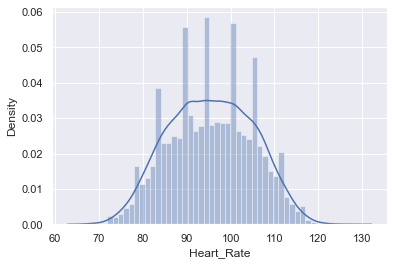

In [52]:
sns.distplot(data["Heart_Rate"])
plt.show()

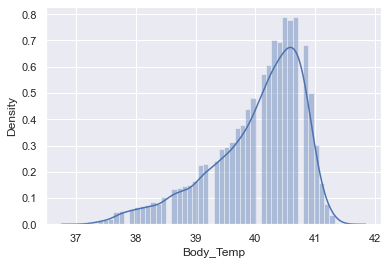

In [53]:
sns.distplot(data["Body_Temp"])
plt.show()

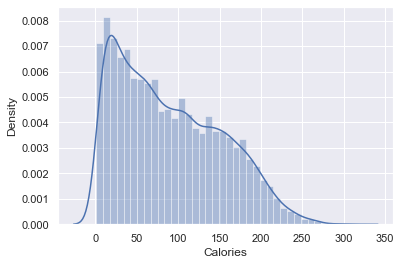

In [54]:
sns.distplot(data["Calories"])
plt.show()

Find correlation


In [55]:
cor=data.corr()


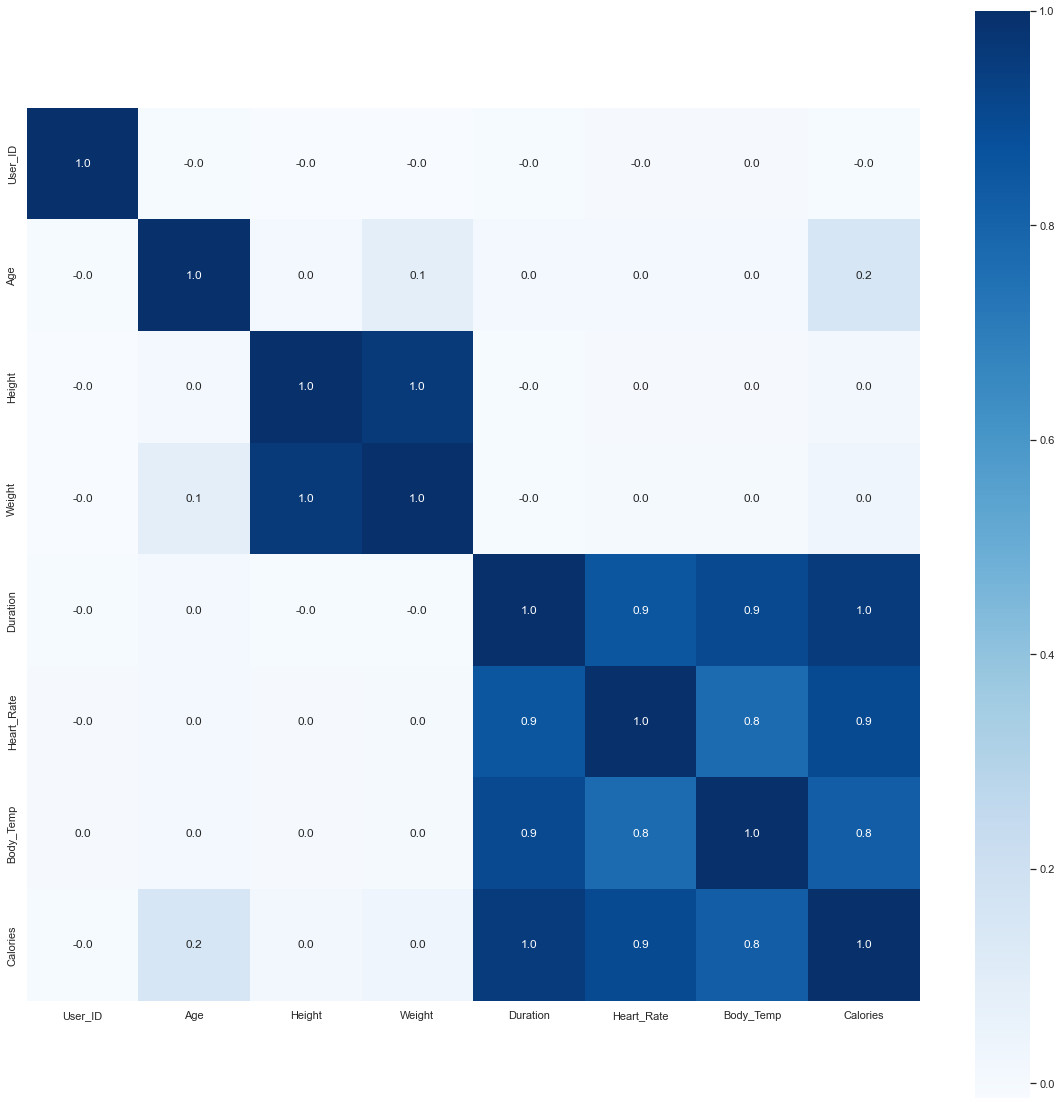

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,cbar=True, square=True, fmt=".1f",annot=True, cmap="Blues")
plt.show()

Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
data["Gender"]=lr.fit_transform(data["Gender"])

In [58]:
data.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0


In [59]:
#Splitting features and target
X=data.drop(["Calories","User_ID"],axis=1)
y=data["Calories"]

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model building with train data

In [63]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Evaluation using Train data

In [64]:
y_lr_train=lr.predict(X_train)
print("Accuracy with train data in Linear regression:", r2_score(y_lr_train,y_train))

Accuracy with train data in Linear regression: 0.9660471679547254


In [65]:
#Evaluation with test data
y_lr_test=lr.predict(X_test)
print("Accuracy with test data in Linear regression:", r2_score(y_lr_test,y_test))

Accuracy with test data in Linear regression: 0.9658035728771159


In [66]:
#Xgboost model
#traning
xg=XGBRegressor()
xg.fit(X_train,y_train)
y_xg_train=xg.predict(X_train)
print("Accuracy with train data in Xgboost regression:", r2_score(y_xg_train,y_train))

Accuracy with train data in Xgboost regression: 0.9995681795994746


In [67]:
#test with XGB
y_xg_test=xg.predict(X_test)
print("Accuracy with test data in Xgboost regression:", r2_score(y_xg_test,y_test))

Accuracy with test data in Xgboost regression: 0.9987651416924423


Prediction with input values

In [70]:
input_data=[1,68,190.0,94.0,29.0,105.0,40.8]
inp=np.asanyarray(input_data)
inp_reshaped=inp.reshape(1,-1)
pred=xg.predict(inp_reshaped)
print(pred)

[231.97958]
